# Programming for Data Analaysis Assignment

# Contents
* [Baseline Data](#Introduction)
    * [Baseline Data & Initial Plot](#Section_1_1)
    * [Baseline Data Clean-up](#Section_1_2)
        * [Grades Clean-up](#Section_1_2_i)
        * [Attendance Clean-up](#Section_1_2_ii)
        * [Outliers](#Section_1_2_iii)
            * [Grades Outliers](#Section_1_2_iii_1)
            * [Attendance Outliers](#Section_1_2_iii_2)
            * [Engagement (Moodle Activity) Outliers](#Section_1_2_iii_3)
    * [Additional Attendance Data](#Section_1_3)
    * [Further Engagement Investigation](#Section_1_4)
    * [Baseline Data Conclusions](#Section_1_5)
* [Secondary Research](#Section_2)
    * [Research of datasets](#Section_2_1)
        * [SAT Scores](#Section_2_1_1)
        * [Attendance & Grades](#Section_2_1_2)
        * [Attendance](#Section_2_1_3)
        * [Student Engagement 1](#Section_2_1_4)
        * [Student Engagement 2](#Section_2_1_5)
    * [Research Theoretical](#Section_2_2)
        * [Grade Distribution](#Section_2_2_1)
        * [Attendance Distribution](#Section_2_2_2)
        * [Engagement Distribution](#Section_2_2_3)
    * [Research Conclusions](#Section_2_3)
* [Simulation](#Section_3)
    * [Section 3.1](#Section_3_1)
        * [Sub Section 3.1.1](#Section_3_1_1)
        * [Sub Section 3.1.2](#Section_3_1_2)
* [Glossary of Terms](#Glossary)
    * [Courses](#Courses)
    * [Modules](#Modules)
* [Bibliography](#Bibliography)

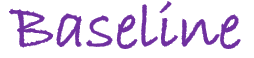

## Introduction
In my current role I have access to student information in relation to their attendance and grades.
I want to look at this data to see is there a correclation between the 2 variables.

I will start off doing some analysis on the baseline data I have to see the distribution of the data. Then I will do some research to either back-up or refute my findings. From there I will then simulate the data using various Python packages.

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from matplotlib.cbook import boxplot_stats

# Section_1_1

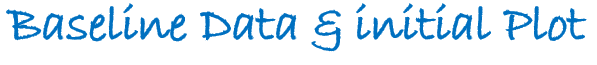

[Back To Top](#Contents)

In [211]:
df = pd.read_csv('data/MyData.csv')
df

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity
0,BSC,IWD,1,1,2021,B7550,NaN,0.667,93.4000,780.0
1,BSC,IWD,1,1,2021,F1099,NaN,0.611,96.8000,631.0
2,BSC,IWD,1,1,2021,F2659,NaN,1.000,39.8000,1390.0
3,BSC,IWD,1,1,2021,F3428,NaN,0.105,49.3000,547.0
4,BSC,IWD,1,1,2021,F6784,NaN,0.000,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
183,SD,RTES,3,2,2019,C5078,NaN,0.800,77.4996,NaN
184,SD,RTES,3,2,2019,D0247,NaN,1.000,69.0971,NaN
185,SD,RTES,3,2,2019,C8959,NaN,0.867,82.7437,NaN
186,SD,RTES,3,2,2019,D2235,NaN,0.600,40.5117,NaN


In [212]:
is_numeric_dtype(df['Grade'])

True

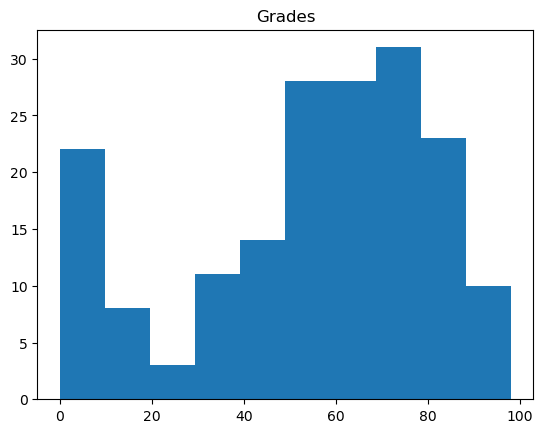

In [213]:
plt.hist(df['Grade'], bins=10, label='Grades')
plt.title('Grades')
plt.show()

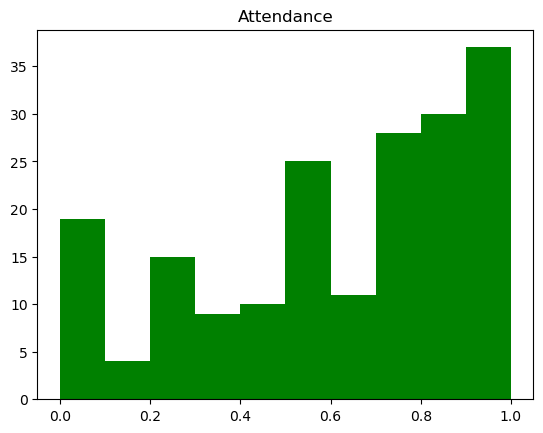

In [214]:
# Ref change histogram color: https://onelinerhub.com/python-matplotlib/how-to-change-histogram-color

plt.hist(df['Attendance'], bins=10, label='Attendance', color='green')
plt.title('Attendance')
plt.show()

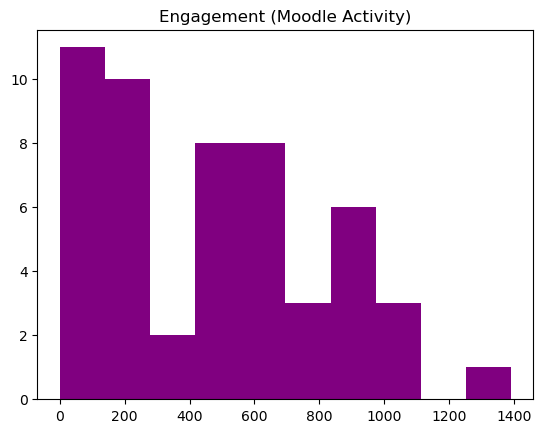

In [215]:
plt.hist(df['Moodle Activity'], bins=10, label='Engagement (Moodle Activity)', color='purple')
plt.title('Engagement (Moodle Activity)')
plt.show()

## Section_1_2
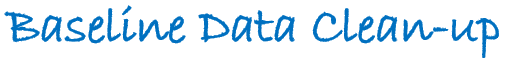

### Section_1-b-i
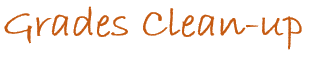

[Back To Top](#Contents)

In [216]:
# Drop the rows with NaN in the Grade Column
df = df.dropna(subset=['Grade'])
df

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity
0,BSC,IWD,1,1,2021,B7550,NaN,0.667,93.4000,780.0
1,BSC,IWD,1,1,2021,F1099,NaN,0.611,96.8000,631.0
2,BSC,IWD,1,1,2021,F2659,NaN,1.000,39.8000,1390.0
3,BSC,IWD,1,1,2021,F3428,NaN,0.105,49.3000,547.0
6,BSC,IWD,1,1,2021,F7902,NaN,0.684,59.7000,730.0
...,...,...,...,...,...,...,...,...,...,...
183,SD,RTES,3,2,2019,C5078,NaN,0.800,77.4996,NaN
184,SD,RTES,3,2,2019,D0247,NaN,1.000,69.0971,NaN
185,SD,RTES,3,2,2019,C8959,NaN,0.867,82.7437,NaN
186,SD,RTES,3,2,2019,D2235,NaN,0.600,40.5117,NaN


In [217]:
# Drop the rows with zero in the Grade Column as this means they did not complete any coursework
df = df.loc[df['Grade'] != 0]
df

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity
0,BSC,IWD,1,1,2021,B7550,NaN,0.667,93.4000,780.0
1,BSC,IWD,1,1,2021,F1099,NaN,0.611,96.8000,631.0
2,BSC,IWD,1,1,2021,F2659,NaN,1.000,39.8000,1390.0
3,BSC,IWD,1,1,2021,F3428,NaN,0.105,49.3000,547.0
6,BSC,IWD,1,1,2021,F7902,NaN,0.684,59.7000,730.0
...,...,...,...,...,...,...,...,...,...,...
183,SD,RTES,3,2,2019,C5078,NaN,0.800,77.4996,NaN
184,SD,RTES,3,2,2019,D0247,NaN,1.000,69.0971,NaN
185,SD,RTES,3,2,2019,C8959,NaN,0.867,82.7437,NaN
186,SD,RTES,3,2,2019,D2235,NaN,0.600,40.5117,NaN


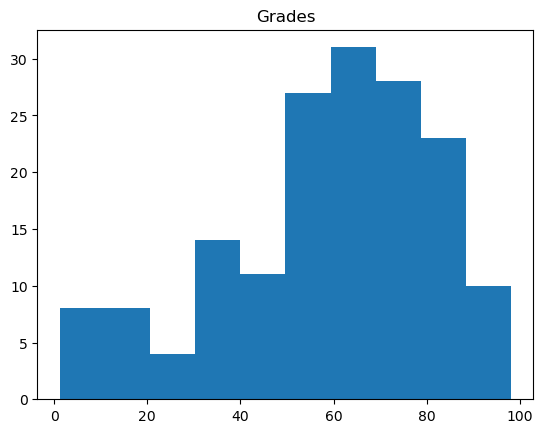

In [218]:
plt.hist(df['Grade'], bins=10, label='Grades')
plt.title('Grades')
plt.show()

In [219]:
# Get the min and max values in the Grade column
df['Grade'].agg(['min', 'max'])

min     1.25
max    98.10
Name: Grade, dtype: float64

In [220]:
# Look at low grades
df.loc[df['Grade'] < 30]

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity
12,BSC,IWD,1,1,2021,G1828,NaN,0.267,4.0000,159.0
15,BSC,IWD,1,1,2021,G2567,NaN,0.313,15.7900,474.0
16,BSC,IWD,1,1,2021,G2921,NaN,0.714,1.9800,147.0
17,BSC,IWD,1,1,2021,G3223,NaN,0.500,6.0000,240.0
18,BSC,IWD,1,1,2021,G4926,NaN,0.800,1.6000,54.0
24,BSC,RWD,1,2,2021,F2659,NaN,0.778,29.9700,1108.0
30,BSC,RWD,1,2,2021,F8824,NaN,0.500,6.5100,555.0
37,BSC,RWD,1,2,2021,G2567,NaN,0.111,16.3500,574.0
47,BSC,RWD,2,2,2021,E9211,NaN,0.250,3.5000,105.0
49,BSC,RWD,2,2,2021,F0005,NaN,0.375,1.8250,113.0


## Section_1_2_ii
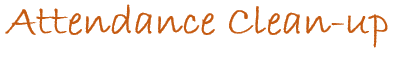

[Back To Top](#Contents)

In [221]:
df.loc[df['Attendance'] == 0.000]

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity
56,BSC,RWD,2,2,2021,F1658,NaN,0.0,1.25,224.0


In [222]:
# Drop the rows with zero in the attendance Column as this means they did not attend the course
df = df.loc[df['Attendance'] != 0.000]
df

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity
0,BSC,IWD,1,1,2021,B7550,NaN,0.667,93.4000,780.0
1,BSC,IWD,1,1,2021,F1099,NaN,0.611,96.8000,631.0
2,BSC,IWD,1,1,2021,F2659,NaN,1.000,39.8000,1390.0
3,BSC,IWD,1,1,2021,F3428,NaN,0.105,49.3000,547.0
6,BSC,IWD,1,1,2021,F7902,NaN,0.684,59.7000,730.0
...,...,...,...,...,...,...,...,...,...,...
183,SD,RTES,3,2,2019,C5078,NaN,0.800,77.4996,NaN
184,SD,RTES,3,2,2019,D0247,NaN,1.000,69.0971,NaN
185,SD,RTES,3,2,2019,C8959,NaN,0.867,82.7437,NaN
186,SD,RTES,3,2,2019,D2235,NaN,0.600,40.5117,NaN


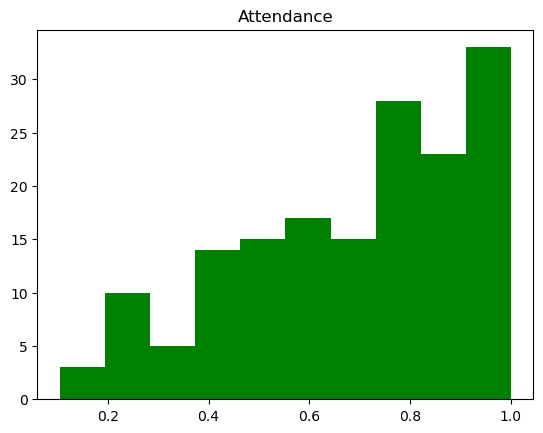

In [223]:
plt.hist(df['Attendance'], bins=10, label='Attendance', color='green')
plt.title('Attendance')
plt.show()

In [224]:
df.loc[df['Attendance'] < 0.1]

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity


In [225]:
# Get the min and max values in the Attendance column
df['Attendance'].agg(['min', 'max'])

min    0.105
max    1.000
Name: Attendance, dtype: float64

In [226]:
# Look at low Attendance
df.loc[df['Attendance'] < 0.3]

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity
3,BSC,IWD,1,1,2021,F3428,NaN,0.105,49.300000,547.0
12,BSC,IWD,1,1,2021,G1828,NaN,0.267,4.000000,159.0
37,BSC,RWD,1,2,2021,G2567,NaN,0.111,16.350000,574.0
47,BSC,RWD,2,2,2021,E9211,NaN,0.250,3.500000,105.0
51,BSC,RWD,2,2,2021,F0778,NaN,0.111,60.400000,212.0
58,BSC,RWD,2,2,2021,F4046,NaN,0.250,26.500000,227.0
102,BSC,PRG,1,2,2020,F1076,NaN,0.280,15.700000,NaN
104,BSC,PRG,1,2,2020,F1244,NaN,0.280,39.800000,NaN
106,BSC,PRG,1,2,2020,F1658,NaN,0.240,52.900000,NaN
111,CNSM,OSS,2,1,2019,D0406,NaN,0.238,50.247512,NaN


### Section_1_2_iii
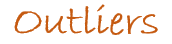

#### Section_1_2_iii_1
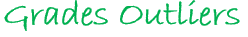

Are extreme values, particularly ones less than 2% or 3% actually outliers?

[Back To Top](#Contents)

In [227]:
df.loc[df['Grade'] < 3]

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity
16,BSC,IWD,1,1,2021,G2921,NaN,0.714,1.980,147.0
18,BSC,IWD,1,1,2021,G4926,NaN,0.800,1.600,54.0
49,BSC,RWD,2,2,2021,F0005,NaN,0.375,1.825,113.0


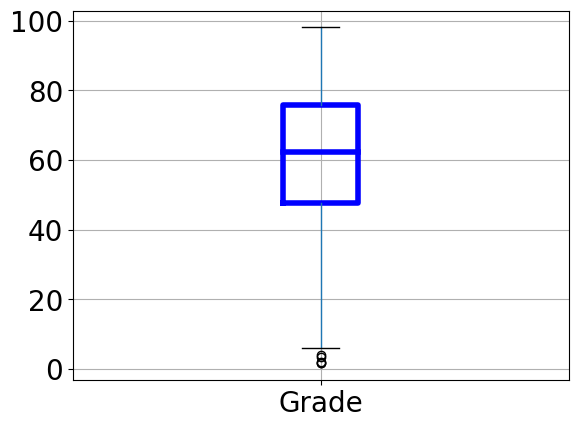

In [228]:
# A boxplot will show any outliers

# Ref Graph style: https://stackoverflow.com/questions/35160956/pandas-boxplot-set-color-and-properties-for-box-median-mean

boxprops = dict(linestyle='-', linewidth=4, color='blue')
medianprops = dict(linestyle='-', linewidth=4, color='blue')

bp = df.boxplot(column=['Grade'], boxprops=boxprops, medianprops=medianprops, fontsize = 20)


In [229]:
# Find the outliers in the dataframe

# Ref: https://stackoverflow.com/questions/71465266/how-to-extract-other-data-of-outlier-that-is-specified-with-that-outlier-in-box

outlier_values = [y for stat in boxplot_stats(df['Grade']) for y in stat['fliers']]
print(outlier_values)

[4.0, 1.98, 1.6, 3.5, 1.825]


In [231]:
# Show dataframe of outliers.

df_outliers = df.loc[df['Grade'].isin(outlier_values), :]
df_outliers

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity
12,BSC,IWD,1,1,2021,G1828,NaN,0.267,4.000,159.0
16,BSC,IWD,1,1,2021,G2921,NaN,0.714,1.980,147.0
18,BSC,IWD,1,1,2021,G4926,NaN,0.800,1.600,54.0
47,BSC,RWD,2,2,2021,E9211,NaN,0.250,3.500,105.0
49,BSC,RWD,2,2,2021,F0005,NaN,0.375,1.825,113.0


In [232]:
# Remove outliers from dataframe.

# Ref: https://www.folkstalk.com/2022/10/opposite-of-isin-pandas-with-code-examples.html

df_clean = df.loc[df['Grade'].isin(outlier_values)==False, :]
df_clean

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity
0,BSC,IWD,1,1,2021,B7550,NaN,0.667,93.4000,780.0
1,BSC,IWD,1,1,2021,F1099,NaN,0.611,96.8000,631.0
2,BSC,IWD,1,1,2021,F2659,NaN,1.000,39.8000,1390.0
3,BSC,IWD,1,1,2021,F3428,NaN,0.105,49.3000,547.0
6,BSC,IWD,1,1,2021,F7902,NaN,0.684,59.7000,730.0
...,...,...,...,...,...,...,...,...,...,...
183,SD,RTES,3,2,2019,C5078,NaN,0.800,77.4996,NaN
184,SD,RTES,3,2,2019,D0247,NaN,1.000,69.0971,NaN
185,SD,RTES,3,2,2019,C8959,NaN,0.867,82.7437,NaN
186,SD,RTES,3,2,2019,D2235,NaN,0.600,40.5117,NaN


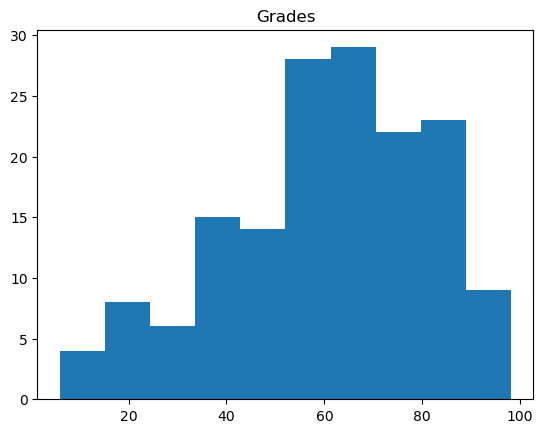

In [233]:
# Now redo the Grade histogram

plt.hist(df_clean['Grade'], bins=10, label='Grades')
plt.title('Grades')
plt.show()

#### Section_1_2_iii_2

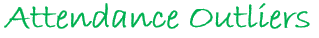

Are extreme values, particularly ones less than 25% actually outliers?

[Back To Top](#Contents)

In [234]:
df.loc[df['Attendance'] < 0.25]

,Course,Module,Year Of Study,Semester,Academic Year,Student ID,Name,Attendance,Grade,Moodle Activity
3,BSC,IWD,1,1,2021,F3428,NaN,0.105,49.300000,547.0
37,BSC,RWD,1,2,2021,G2567,NaN,0.111,16.350000,574.0
51,BSC,RWD,2,2,2021,F0778,NaN,0.111,60.400000,212.0
106,BSC,PRG,1,2,2020,F1658,NaN,0.240,52.900000,NaN
111,CNSM,OSS,2,1,2019,D0406,NaN,0.238,50.247512,NaN
127,CNSM,OSS,2,1,2019,C4881,NaN,0.238,61.009950,NaN
162,SD,RTES,3,2,2019,D0098,NaN,0.241,14.555700,NaN


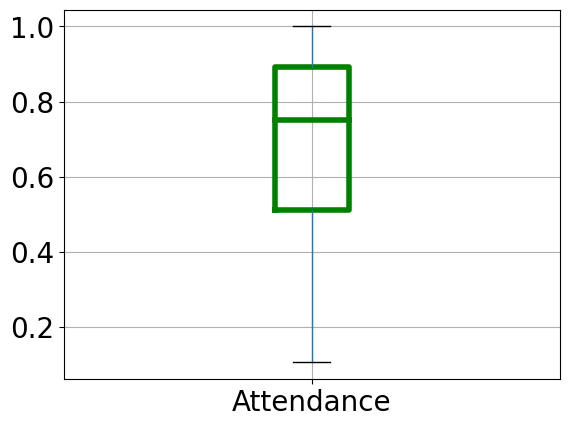

In [235]:
# A boxplot will show any outliers for Attendance

# There are none for Attendance

boxprops = dict(linestyle='-', linewidth=4, color='green')
medianprops = dict(linestyle='-', linewidth=4, color='green')

bp = df.boxplot(column=['Attendance'], boxprops=boxprops, medianprops=medianprops, fontsize = 20)


In [236]:
outlier_values = [y for stat in boxplot_stats(df['Attendance']) for y in stat['fliers']]
print(outlier_values)

[]


#### Section_1_2_iii_3

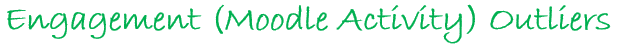

[Back To Top](#Contents)

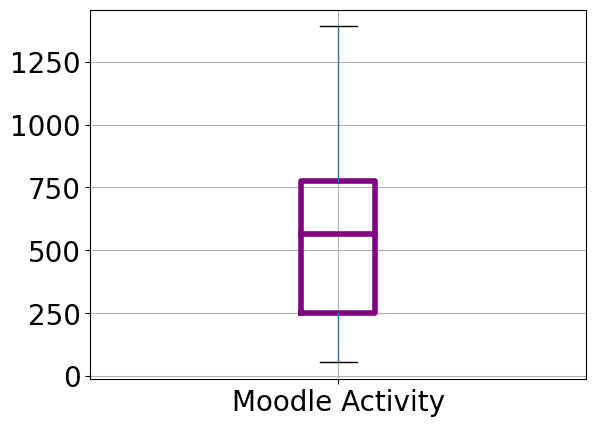

In [237]:
# A boxplot will show any outliers

# There are none for Engagement (Moodle activity)

boxprops = dict(linestyle='-', linewidth=4, color='purple')
medianprops = dict(linestyle='-', linewidth=4, color='purple')

bp = df.boxplot(column=['Moodle Activity'], boxprops=boxprops, medianprops=medianprops, fontsize = 20)


In [238]:
outlier_values = [y for stat in boxplot_stats(df['Moodle Activity']) for y in stat['fliers']]
print(outlier_values)

[]


# Section_1_3

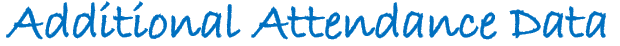

[Back To Top](#Contents)

Due to the fact that there is no clear distribution for the attendance data I am investigating further.

The previous data was mainly taken around Covid times so I am including data from before Covid for attendance as there seems to have been an impact during and since covid on College attendance.

This data is all from 2018. I do not have corresponding grades and Moodle activity, this is purely attendance data.

In [239]:
attend_only_df = pd.read_csv('data/MyDataAttendanceOnly.csv')
attend_only_df

,Academic Year,Year of Study,Semester,Attendance
0,2018,1,2,0.526316
1,2018,1,2,0.473684
2,2018,1,2,0.736842
3,2018,1,2,0.842105
4,2018,1,2,0.894737
...,...,...,...,...
61,2018,2,2,0.566667
62,2018,2,2,0.241379
63,2018,2,2,0.620690
64,2018,2,2,0.275862


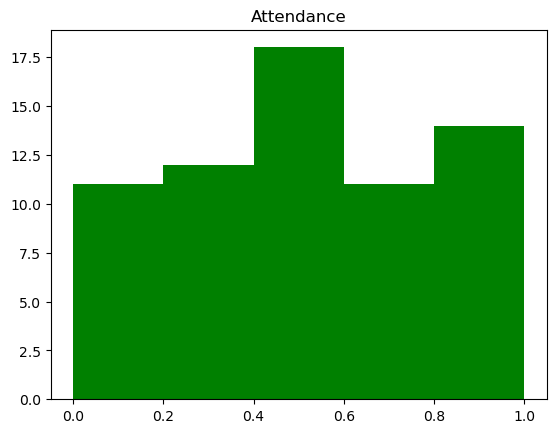

In [240]:
plt.hist(attend_only_df['Attendance'], bins=5, label='Attendance', color='green')
plt.title('Attendance')
plt.show()

In [241]:
# ERROR: This was an error where I had named 2 data frames the same and ran the cells out of sync so the above 
# histogram was not reflecting the data I expected it to reflect so I was running further tests.
# SOLUTION: I renamed the dataset and ran all cells again and the issue has been resolved.

# The number of values falling above 80% seems high so I am going to take a closer look

attend_only_df.loc[attend_only_df['Attendance'] > 0.8]

,Academic Year,Year of Study,Semester,Attendance
3,2018,1,2,0.842105
4,2018,1,2,0.894737
5,2018,1,2,0.894737
6,2018,1,2,0.947368
7,2018,1,2,0.947368
8,2018,1,2,1.000000
9,2018,1,2,1.000000
15,2018,1,2,0.954545
17,2018,1,2,0.863636
18,2018,1,2,0.818182


## Section_1_4

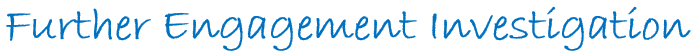

[Back To Top](#Contents)

In [242]:
# Read in csv on number of Moodle events per user (151 rows).

moodle_df = pd.read_csv('data/MoodleEvents.csv')
moodle_df

,Year,VLE Activity
0,1,742
1,1,643
2,1,315
3,1,401
4,1,402
...,...,...
146,4,197
147,4,482
148,4,198
149,4,352


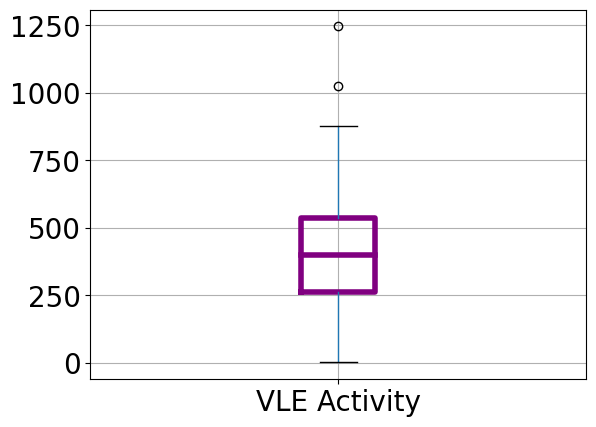

In [243]:
# A boxplot will show any outliers

boxprops = dict(linestyle='-', linewidth=4, color='purple')
medianprops = dict(linestyle='-', linewidth=4, color='purple')

bp = moodle_df.boxplot(column=['VLE Activity'], boxprops=boxprops, medianprops=medianprops, fontsize = 20)

In [244]:
# Get a list of outliers

outlier_values = [y for stat in boxplot_stats(moodle_df['VLE Activity']) for y in stat['fliers']]
print(outlier_values)

# Remove outliers from dataframe.

clean_moodle_df = moodle_df.loc[moodle_df['VLE Activity'].isin(outlier_values)==False, :]
print(clean_moodle_df)

[1246, 1026]
     Year  VLE Activity
0       1           742
1       1           643
2       1           315
3       1           401
4       1           402
..    ...           ...
146     4           197
147     4           482
148     4           198
149     4           352
150     4           444

[149 rows x 2 columns]


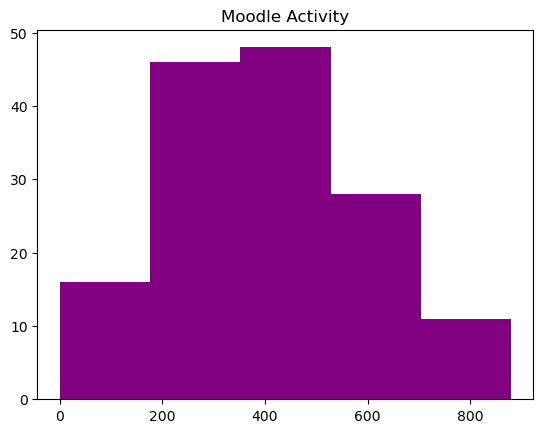

In [245]:
plt.hist(clean_moodle_df['VLE Activity'], bins=5, label='Moodle Activity', color='purple')
plt.title('Moodle Activity')
plt.show()

## Section_1_5

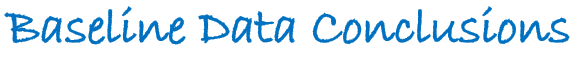

[Back To Top](#Contents)

The analysis indicated that there were outliers in the grade column but not in the attendance or Moodle Activity columns.

After cleaning the data it looks as though the grades data falls into a normal distribution.

The curve is not the perfect bell curve but there is not a large enough sample to reject the notion of a normal distribution.

The data for Attendance was not in an obvious distribution. In my experience attendance was seriosly affected during covid times. In my opinion, this effect has not fully reverted to pre-covid times. For that reason I did further research on attendance by gathering data on attendance from pre-covid times (Section_1_3). This data did seem to reflect a more normal distribution.

The data for Engagement (Moodle Activity) was not in an obvious distribution. Again with the covid pandemic in mind, I decided to get more recent data. The second set of data (Section_1_4) if from The Academic year 2022, semester 1 (Not including reading week and exam week as they are taking place in the following weeks, starting December 5th 2022). The reason for not using this data initially is that there are no final grades available for these student/module pairings. This data showed a much more consistent distribution. Again this data is reflecting a normal distribution

Further research is needed in all cases. For this I will do some secondary research.


# Section_2

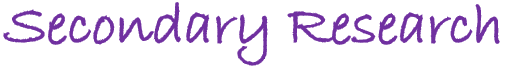

Researching data to see what the distribution is.

## Section_2_1


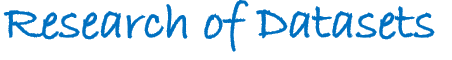

### Section_2_1_1

[Back To Top](#Contents)

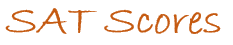

I have looked at some datasets with regard to grades.
This first one is from Kaggle.com and is in relation to SAT scores in New York

Ref:https://www.kaggle.com/datasets/new-york-city/new-york-city-sat-results?resource=download&select=2012-sat-results.csv


In [246]:
# Read in the dtya (421 roaws of usable data)
# Names of columns modified as they were very long and had puncuation in them.
# 'SAT' removed from start and 'Avg. Score' removed from end.

sat_df = pd.read_csv('data/2012-sat-results.csv')
sat_df

,DBN,SCHOOL NAME,Num of SAT Test Takers,Critical Reading,Math,Writing
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,s,s,s
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,s,s,s
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,s,s,s
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426


In [247]:
# Drop the rows with 's' in any Column
sat_df = sat_df.loc[sat_df['Num of SAT Test Takers'] != "s"]

sat_df = sat_df.loc[sat_df['Critical Reading'] != "s"]

sat_df = sat_df.loc[sat_df['Math'] != "s"]

sat_df = sat_df.loc[sat_df['Writing'] != "s"]

sat_df

,DBN,SCHOOL NAME,Num of SAT Test Takers,Critical Reading,Math,Writing
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
...,...,...,...,...,...,...
466,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,23,347,358,350
467,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,24,359,317,358
471,75Q811,P.S. Q811,32,429,444,433
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426


In [248]:
# Ref: https://stackoverflow.com/questions/19900202/how-to-determine-whether-a-column-variable-is-numeric-or-not-in-pandas-numpy

is_numeric_dtype(sat_df['Critical Reading'])

False

In [249]:
# Convert string columns to numeric where applicable.

# Ref: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
        
sat_df[["Critical Reading", "Math", "Writing"]] = sat_df[["Critical Reading", "Math", "Writing"]].apply(pd.to_numeric)

In [250]:
is_numeric_dtype(sat_df['Critical Reading'])

True

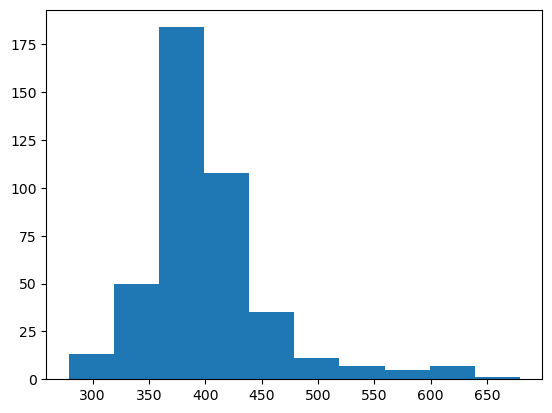

In [251]:
# Now do the Grade histogram for SAT Critical Reading Avg Score

plt.hist(sat_df['Critical Reading'], bins=10, label='SAT Critical Reading Avg Score')
plt.show()

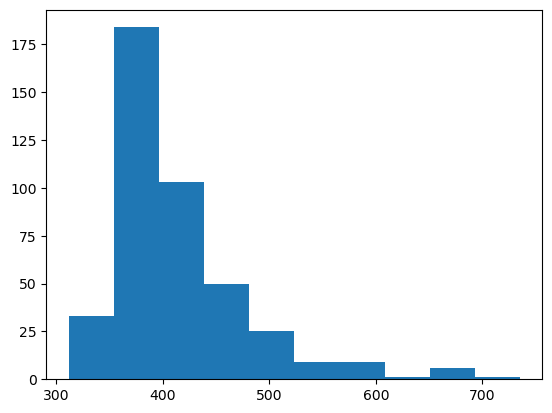

In [252]:
# Now do the Grade histogram for SAT Math Avg Score

plt.hist(sat_df['Math'], bins=10, label='SAT Math Avg Score')
plt.show()

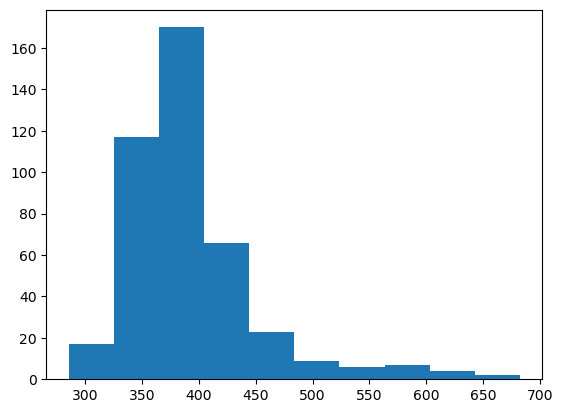

In [253]:
# Now do the Grade histogram for SAT Writing Avg Score

plt.hist(sat_df['Writing'], bins=10, label='SAT Writing Avg Score')
plt.show()

### Section_2_1_2

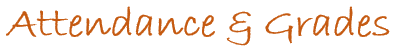

[Back To Top](#Contents)

This next dataset is also from Kaggle.com and is in relation to learning a pattern of the performance of  students based on mid-semester examination(MSE), and end-semester examination (ESE).

Ref: https://www.kaggle.com/datasets/akiwelekar/predictingese?select=AttendanceMarksSA.csv

In [254]:
# Read in the data (72 rows)

perform_df = pd.read_csv('data/AttendanceMarksSA.csv')
perform_df

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44
...,...,...,...
68,80,10,47
69,78,8,40
70,92,9,49
71,78,11,53


In [255]:
# Checking if columns are numeric
print(is_numeric_dtype(perform_df['Attendance']))
print(is_numeric_dtype(perform_df['MSE']))
print(is_numeric_dtype(perform_df['ESE']))

True
True
True


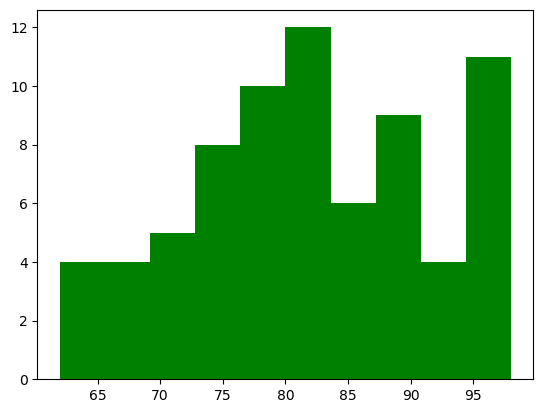

In [256]:
# Now do the Grade histogram for SAT Critical Reading Avg Score
plt.hist(perform_df['Attendance'], bins=10, label='Attendance', color='green')
plt.show()

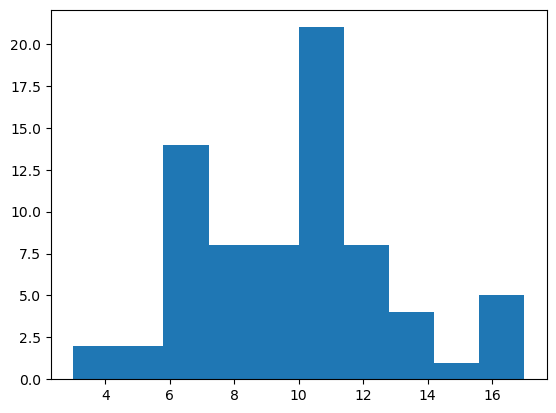

In [257]:
# Now do the Grade histogram for SAT Critical Reading Avg Score

plt.hist(perform_df['MSE'], bins=10, label='Mid Semester Exam')
plt.show()

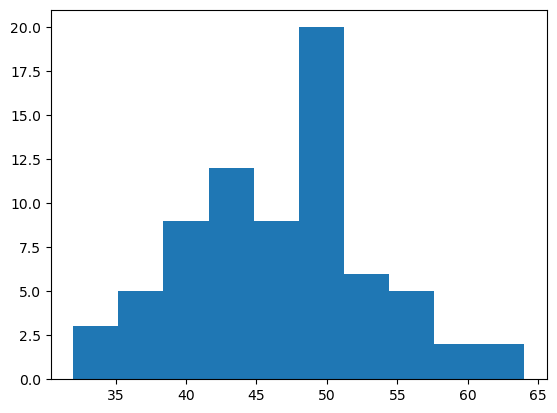

In [258]:
# Now do the Grade histogram for SAT Critical Reading Avg Score

plt.hist(perform_df['ESE'], bins=10, label='End Semester Exam')
plt.show()

### Section_2_1_3

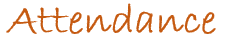

[Back To Top](#Contents)

This next dataset is also from Kaggle.com and is in relation to attendandce of students. The data was in 22 separate .csv files, I have collated the first 8 of them as they give me sufficient data to make a preliminary analysis on. The data is now one column of attendance in percent/decimal.

Ref: https://www.kaggle.com/datasets/thajegan76/attendance/download?datasetVersionNumber=2

In [259]:
# Read in the data (242 rows)

attend_df = pd.read_csv('data/AttendThayanithyJegan.csv')
attend_df

,Attendance
0,0.739130
1,0.086957
2,0.130435
3,0.652174
4,0.739130
...,...
237,0.090909
238,0.227273
239,0.681818
240,1.000000


In [260]:
# Checking if column is numeric
print(is_numeric_dtype(attend_df['Attendance']))

True


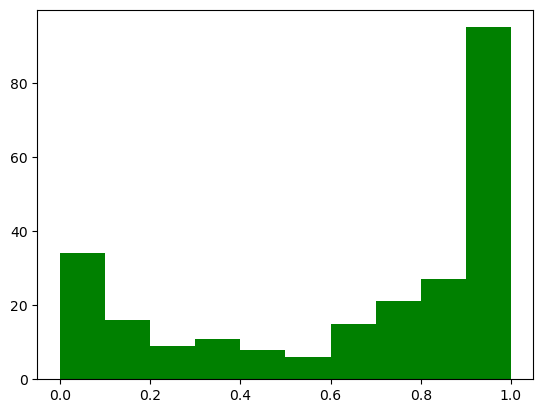

In [261]:
# Now do the Grade histogram for the attendance

plt.hist(attend_df['Attendance'], bins=10, label='Attendance', color='green')
plt.show()

### Section_2_1_4

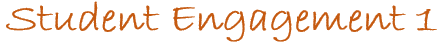

[Back To Top](#Contents)

In [262]:
# Read in the data in relation to Student Engagement (18344 rows)

# Ref: https://www.kaggle.com/datasets/thedevastator/student-engagement-with-tableau-a-data-science-p

engage_df = pd.read_csv('data/StudentEngagement.csv')
engage_df

,Student id,Engagement
0,258798,1
1,258800,44
2,258803,30
3,258804,2
4,258807,1
...,...,...
18339,295509,1
18340,295510,1
18341,295511,2
18342,295512,2


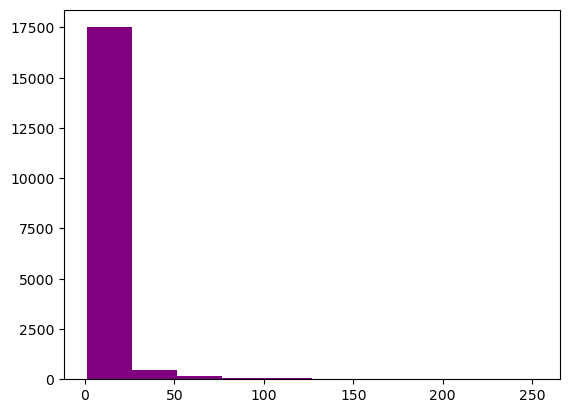

In [263]:
# Now do the Grade histogram for the Engagement

plt.hist(engage_df['Engagement'], bins=10, label='Engagement', color='purple')
plt.show()

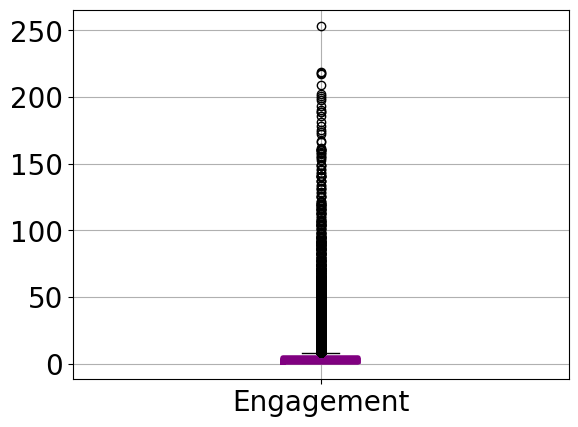

In [264]:
# Check for outliers with a boxplot

# There are none for Engagement (Moodle activity)

boxprops = dict(linestyle='-', linewidth=4, color='purple')
medianprops = dict(linestyle='-', linewidth=4, color='purple')

bp = engage_df.boxplot(column=['Engagement'], boxprops=boxprops, medianprops=medianprops, fontsize = 20)

In [265]:
# Find the outliers in the dataframe

outlier_vals = [y for stat in boxplot_stats(engage_df['Engagement']) for y in stat['fliers']]
print(outlier_vals)

[44, 30, 106, 30, 19, 40, 44, 24, 9, 9, 15, 15, 60, 20, 23, 10, 26, 9, 23, 33, 34, 19, 35, 79, 11, 19, 49, 10, 21, 10, 22, 13, 90, 13, 13, 161, 13, 77, 9, 57, 28, 160, 11, 37, 23, 15, 11, 10, 10, 18, 87, 13, 9, 11, 23, 9, 34, 89, 22, 23, 21, 85, 48, 24, 15, 10, 20, 74, 9, 23, 24, 9, 15, 35, 17, 17, 13, 181, 23, 18, 10, 9, 117, 51, 55, 42, 49, 45, 43, 80, 9, 19, 13, 77, 10, 22, 29, 13, 10, 121, 12, 31, 57, 10, 43, 11, 9, 21, 104, 198, 27, 9, 31, 60, 44, 12, 12, 25, 16, 39, 15, 31, 13, 14, 178, 15, 50, 17, 202, 45, 70, 19, 64, 82, 14, 22, 141, 94, 41, 9, 48, 115, 23, 56, 24, 18, 16, 10, 189, 9, 18, 26, 18, 87, 46, 32, 13, 20, 10, 18, 48, 49, 39, 15, 9, 21, 20, 66, 36, 61, 19, 23, 39, 50, 15, 12, 94, 50, 38, 73, 11, 9, 160, 13, 49, 77, 28, 15, 9, 30, 48, 69, 34, 14, 98, 9, 9, 101, 28, 13, 46, 19, 141, 16, 58, 108, 31, 38, 13, 27, 27, 32, 28, 44, 25, 11, 28, 26, 16, 36, 47, 29, 54, 10, 26, 174, 56, 78, 30, 22, 190, 10, 11, 17, 58, 36, 47, 15, 10, 60, 9, 48, 25, 122, 37, 22, 16, 63, 9, 20, 

In [266]:
# Get the min and max values in the Grade column
engage_df['Engagement'].agg(['min', 'max'])

min      1
max    253
Name: Engagement, dtype: int64

In [267]:
# Remove outliers from dataframe.

df_clean = engage_df.loc[engage_df['Engagement'].isin(outlier_vals), :]
df_clean

,Student id,Engagement
1,258800,44
2,258803,30
14,258818,106
16,258822,30
24,258832,19
...,...,...
17912,294783,11
17925,294807,10
17987,294907,13
18016,294949,11


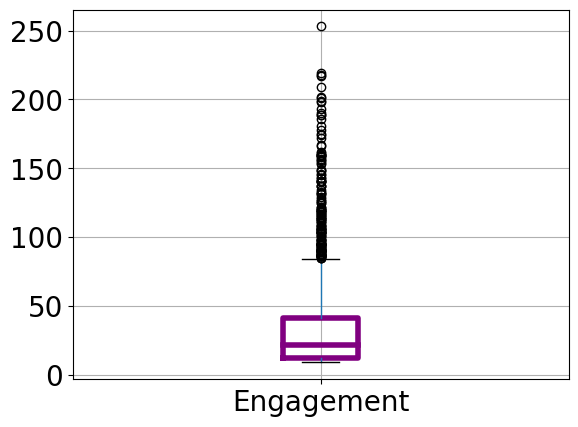

In [268]:
# Replot after outliers are removed

boxprops = dict(linestyle='-', linewidth=4, color='purple')
medianprops = dict(linestyle='-', linewidth=4, color='purple')

bp = df_clean.boxplot(column=['Engagement'], boxprops=boxprops, medianprops=medianprops, fontsize = 20)

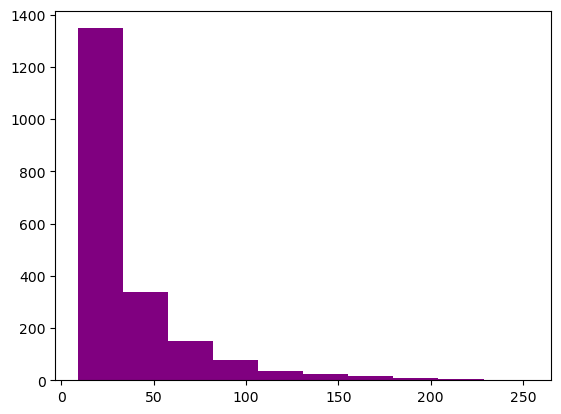

In [269]:
# Now do the Grade histogram for the Engagement

plt.hist(df_clean['Engagement'], bins=10, label='Engagement', color='purple')
plt.show()

In [270]:
# Get the min and max values in the Grade column
df_clean['Engagement'].agg(['min', 'max'])

min      9
max    253
Name: Engagement, dtype: int64

In [271]:
# Find the outliers in the dataframe

outlier_vals = [y for stat in boxplot_stats(df_clean['Engagement']) for y in stat['fliers']]
print(outlier_vals)

# Remove outliers from dataframe.

df_clean = engage_df.loc[engage_df['Engagement'].isin(outlier_vals), :]
print(df_clean)

[106, 90, 161, 160, 87, 89, 85, 181, 117, 121, 104, 198, 178, 202, 141, 94, 115, 189, 87, 94, 160, 98, 101, 141, 108, 174, 190, 122, 95, 219, 146, 149, 172, 175, 131, 101, 217, 104, 116, 189, 106, 91, 156, 115, 115, 159, 134, 158, 86, 104, 143, 95, 85, 166, 209, 121, 113, 145, 113, 93, 98, 118, 125, 111, 88, 96, 143, 132, 92, 95, 155, 105, 90, 107, 140, 86, 218, 104, 141, 109, 199, 106, 186, 149, 86, 112, 133, 90, 201, 91, 153, 125, 120, 253, 129, 103, 104, 118, 126, 113, 94, 137, 118, 86, 167, 110, 137, 160, 90, 193, 120, 99, 141, 128, 117, 99, 88, 91, 103, 96, 113, 85, 91, 94, 148, 86, 91, 162, 92, 120, 88, 137, 86, 108, 160, 88, 157, 120, 97, 95, 91, 126, 131, 87, 106, 105, 101, 93, 90, 154, 97, 108, 93, 89, 91, 89, 116, 119, 87, 102, 112, 95]
       Student id  Engagement
14         258818         106
186        259106          90
222        259174         161
280        259283         160
348        259429          87
...           ...         ...
12517      284438         119
125

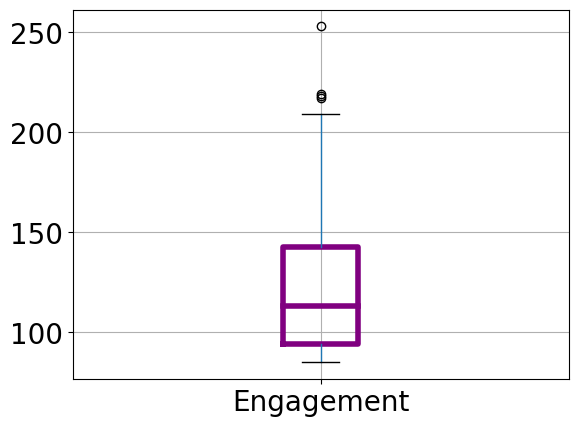

In [272]:
# Replot after outliers are removed

boxprops = dict(linestyle='-', linewidth=4, color='purple')
medianprops = dict(linestyle='-', linewidth=4, color='purple')

bp = df_clean.boxplot(column=['Engagement'], boxprops=boxprops, medianprops=medianprops, fontsize = 20)

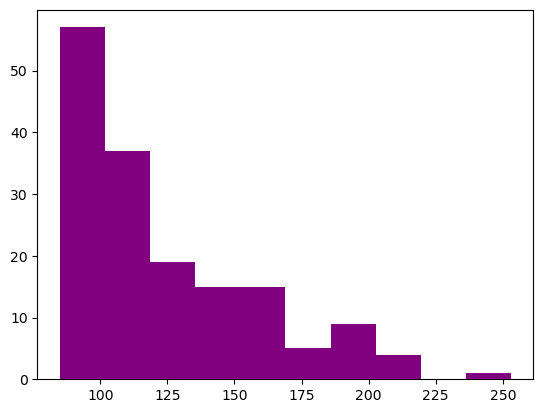

In [273]:
# Now do the Grade histogram for the attendance

plt.hist(df_clean['Engagement'], bins=10, label='Engagement', color='purple')
plt.show()

### Section_2_1_5

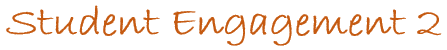

[Back To Top](#Contents)

In [274]:
# Read in the data in relation to Student Engagement (480 rows)

# Ref: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data

engage_df2 = pd.read_csv('data/StudentPerformance.csv')
engage_df2

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


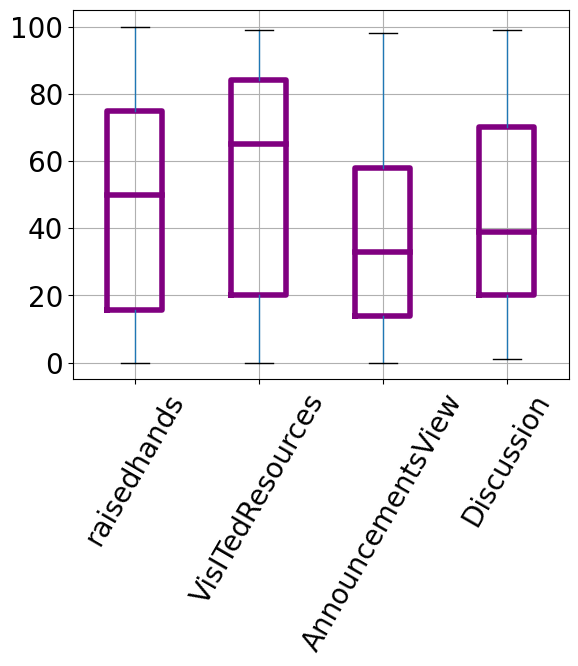

In [275]:
# A boxplot will show any outliers

# Ref Graph style: https://stackoverflow.com/questions/35160956/pandas-boxplot-set-color-and-properties-for-box-median-mean

boxprops = dict(linestyle='-', linewidth=4, color='purple')
medianprops = dict(linestyle='-', linewidth=4, color='purple')

bp = engage_df2.boxplot(column=['raisedhands','VisITedResources','AnnouncementsView', 'Discussion'], rot=60, boxprops=boxprops, medianprops=medianprops, fontsize = 20)


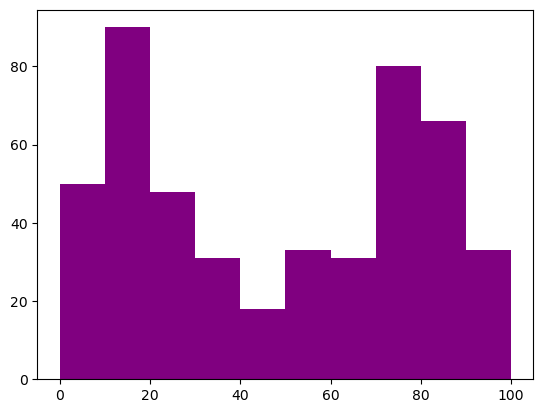

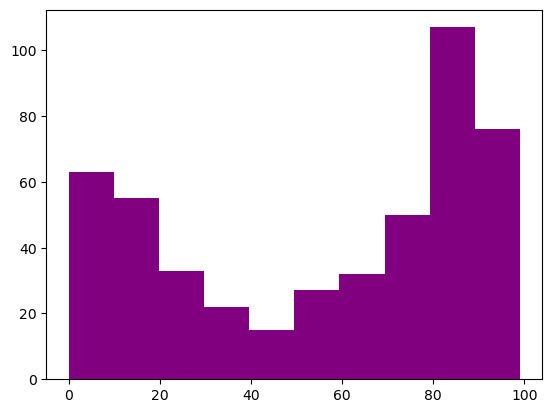

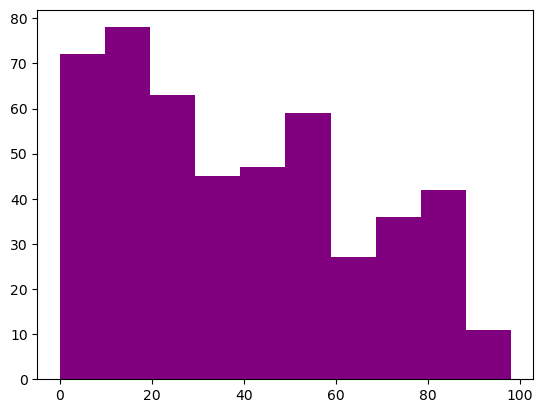

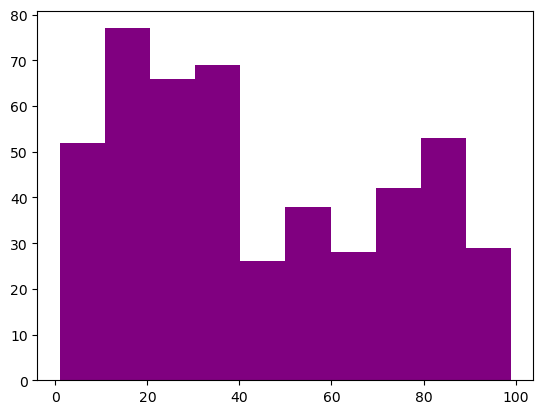

In [276]:
# Now do the Engagement histograms

plt.hist(engage_df2['raisedhands'], bins=10, label='Raised Hands', color='purple')
plt.show()


plt.hist(engage_df2['VisITedResources'], bins=10, label='Visited Resources', color='purple')
plt.show()

plt.hist(engage_df2['AnnouncementsView'], bins=10, label='Announcements Viewed', color='purple')
plt.show()


plt.hist(engage_df2['Discussion'], bins=10, label='Discussion', color='purple')
plt.show()

In [277]:
engage_df2["Engagement"] = engage_df2['raisedhands'] + engage_df2["VisITedResources"] + engage_df2['AnnouncementsView'] + engage_df2["Discussion"]
engage_df2

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Engagement
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,53
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,68
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,47
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,95
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L,22
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M,169
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M,183
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L,118


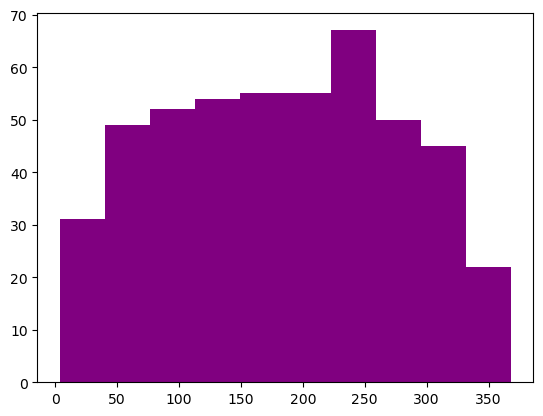

In [278]:
# Now do the Total Engagement histogram

plt.hist(engage_df2['Engagement'], bins=10, label='Total Engagement', color='purple')
plt.show()

## Section_2_2

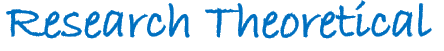

[Back To Top](#Contents)

### Section_2_2_1

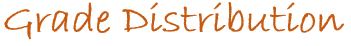

[Back To Top](#Contents)

In my observation of my own data as well as data sourced, I am leaning towards grades following a normal distribution. I will invetigate this further with research to confirm my findings so far.

Attendance or engagement with the course/subject does not have an obvious distribution and further research is needed. 

Minn (n.d.) states that 'in many school courses, the distribution of grades also roughly follows a normal curve'. As my findings have suggested there is much research to stating that student grades follow a normal distribution. In many cases Student grades and the heights and weights of people are used as an example of Normal Distribution when explaining the concept. This is true in Nadeem (2022) wqhen he states:
<blockquote>The normal distribution frequently appears in nature and life in various forms. For example, the scores of a quiz follow a normal distribution. Many of the students scored between 60 and 80 as illustrated in the graph below.</blockquote>

Mac Aogain (2008) states that attendance in primary schools is 'distributed fairly symmetrically around a mean of 5.26'. Also showing a histogram of the attendance
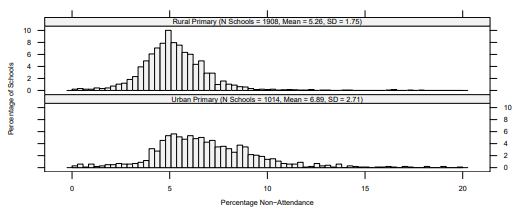


### Section_2_2_2

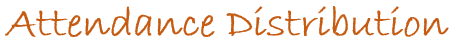

[Back To Top](#Contents)

My own data suggested that attendance follows a normal distribution. This was backed up by further datasets shown in Section_2_1. The data did not show a definitive distribution.So further research is required.

Dobkin et al (2012) States that
<blockquote>
    The majority of classes have between 35 and 90 percent of the students attending, with the modal class having an attendance rate of between 60 and 65 percent.
</blockquote>
This is supported by a histogram of 206 lecture classes with over 50 students enroled at the University of California.

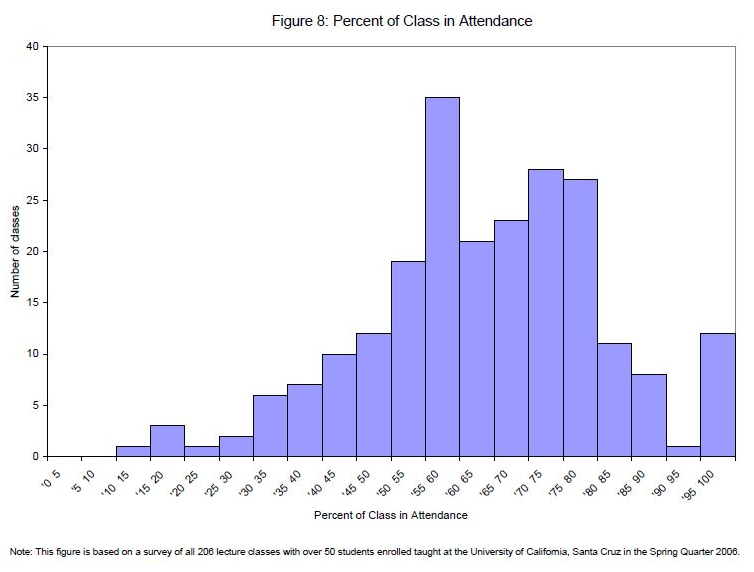

Costas (2018) also suggests a normal distribution for attendance using data from a hospitality school.

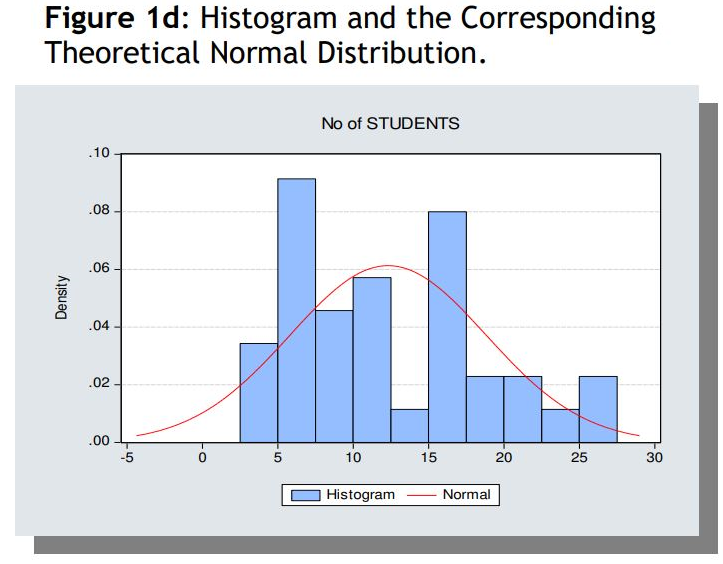


### Section_2_2_3

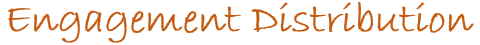

[Back To Top](#Contents)

Rajabalee et al. suggests that student engagement does not fall into a normal distribution and it is in fact left-skewed. They did state that both "overall performance and the continuous learning activities marks could be assumed to be normally distributed".

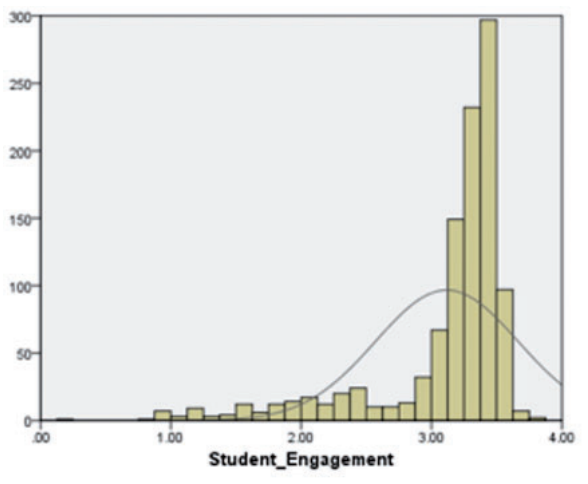

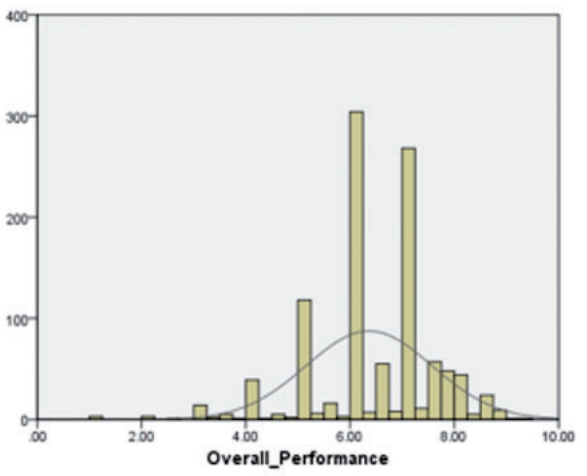

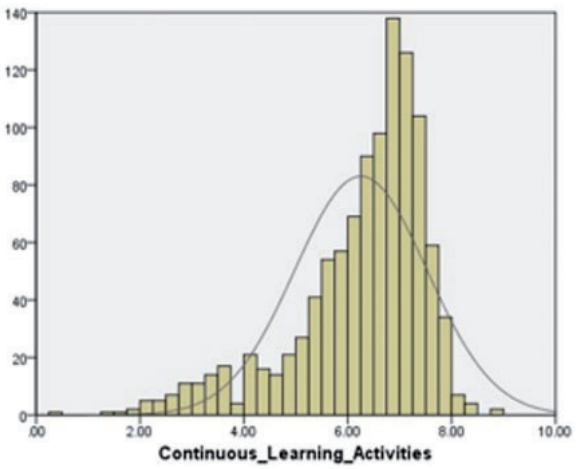

This research is quite relevant to the data I am analysing as it is in relation to Moodle activity and grades. On investigating deeper the criteria for Student engagement is not the sme as what I am using in my investigation as I am simply using Moodle events. A Moodle event is when a user interacts with the Virtual Learning Environment (VLE) in any way. Rajalalee et al. (2018) use the following criteria to determine student engagement:
<blockquote>
1. No of completed assignments
2. Importance level (as per course outcomes) of completed assignments
3. Activities requiring platform presence
</blockquote>

When comparing the two definitions of Student Engagement my definition is more in line with Rajabalee et al's (2018) "continuous learning activities", which they state falls into a normal distribution (as per the above graph).

## Section_2_3

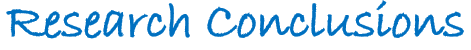

# Section_3
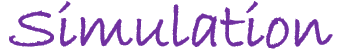

[Back To Top](#Contents)

In [279]:
# create a range of numbers from 1 to 200 for the 'student id'
idx = pd.Series(range(1,201))
idx

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Length: 200, dtype: int64

In [280]:
rng = np.random.default_rng()
rng.normal(1,100)

-55.81386923262745

In [281]:
simulated_df = pd.DataFrame(data=rng.normal(loc=50.0, scale=15.0, size=len(idx)), index=idx, columns = ['VLE_Activity'])
simulated_df

,VLE_Activity
1,60.843765
2,38.697966
3,21.770315
4,37.344496
5,64.949167
...,...
196,46.806049
197,88.584670
198,42.211746
199,76.126370


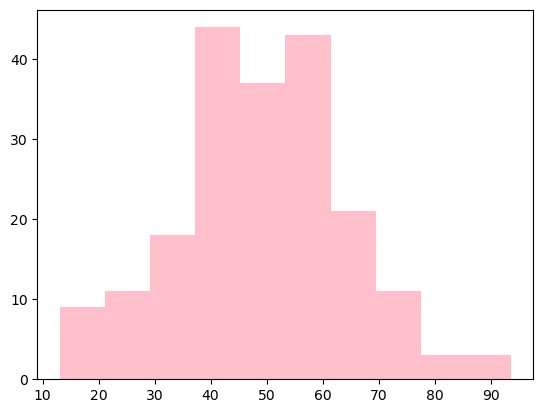

In [282]:
# Now do the Simulated VEL Activity histogram

plt.hist(simulated_df['VLE_Activity'], bins=10, label='VLE Activity', color='pink')
plt.show()

In [283]:
arr = data=rng.normal(loc=50.0, scale=15.0, size=len(idx))
simulated_df['Grades'] = arr
simulated_df

,VLE_Activity,Grades
1,60.843765,62.147037
2,38.697966,55.695747
3,21.770315,88.507979
4,37.344496,24.905273
5,64.949167,49.062184
...,...,...
196,46.806049,62.671611
197,88.584670,58.453607
198,42.211746,64.159307
199,76.126370,56.236915


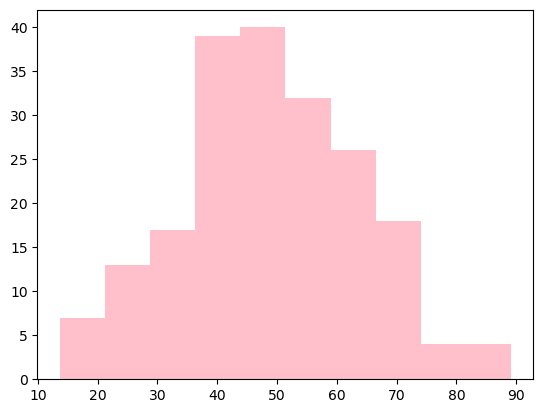

In [284]:
# Now do the Simulated Grades histogram

plt.hist(simulated_df['Grades'], bins=10, label='Grades', color='pink')
plt.show()

In [285]:
arr = data=rng.normal(loc=50.0, scale=15.0, size=len(idx))
simulated_df['Attendance'] = arr
simulated_df

,VLE_Activity,Grades,Attendance
1,60.843765,62.147037,37.139408
2,38.697966,55.695747,55.746266
3,21.770315,88.507979,57.416260
4,37.344496,24.905273,67.598490
5,64.949167,49.062184,54.614876
...,...,...,...
196,46.806049,62.671611,55.942698
197,88.584670,58.453607,55.861012
198,42.211746,64.159307,48.907254
199,76.126370,56.236915,54.265155


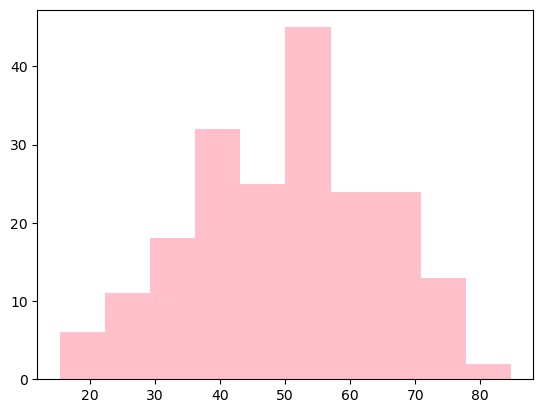

In [286]:
# Now do the Simulated Attendance histogram

plt.hist(simulated_df['Attendance'], bins=10, label='Attendance', color='pink')
plt.show()

# Glossary

[Back To Top](#Contents)

## Courses

BSC:
Business Computing

CNSM:
Computer Networks & System Management

ISD:
Internet Software Development

SD:
Software Development

## Modules
	
IWD:
Intro To Web Develpoment

RWD:
Responsive Web Development

DB:
Databases 1

PRG:
Programming

OSS:
Operating Systems Structures

RTES:
Real Time Embedded Systems

# Bibliography

[Back To Top](#Contents)

Costas, L., (2018), The Relation between Absences and Grades: A Statistical Analysis. Available at: https://mpra.ub.uni-muenchen.de/84655/4/MPRA_paper_84655.pdf (Accessed: 02 December 2022).

Dobkin, C., Gil, R., Marion, J.,(2012), Causes and Consequences of Skipping Class in College. Available at: https://www.researchgate.net/figure/Distribution-of-Student-Attendance_fig1_245622925 (Accessed: 02 December 2022).


Mac Aogáin, E., (2008), Analysis of School Attendance Data in Primary and Post-Primary Schools, 2003/4 to 2005/6. Available at: https://www.tusla.ie/uploads/content/school_attendance_report_2003_2004.pdf (Accessed: 01 December 2022).

Minn, M., (n.d.), Curving Grades With a Normal Distribution. Available at: https://michaelminn.net/tutorials/normal-curve-grading/ (Accessed: 01 December 2022).

Nadeem, A., (2022), 7 types of statistical distributions with examples. Available at: https://datasciencedojo.com/blog/types-of-statistical-distributions-in-ml/ (Accessed: 01 December 2022).

Rajabalee, Y. B., Santally, M. I., Rennie, F. (2019) A study of the relationship between students’ engagement and their academic performances in an eLearning environment. Available at: https://journals.sagepub.com/doi/pdf/10.1177/2042753019882567 (Accessed: 02 December 2022).

